# SQL Project <a id='intro'></a>

## Project Description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

## Description of Data
A database with info on taxi rides in Chicago:

`neighborhoods` table: data on city neighborhoods
- **name**: name of the neighborhood
- **neighborhood_id**: neighborhood code

`cabs` table: data on taxis
- **cab_id**: vehicle code
- **vehicle_id**: the vehicle's technical ID
- **company_name**: the company that owns the vehicle

`trips` table: data on rides
- **trip_id**: ride code
- **cab_id**: code of the vehicle operating the ride
- **start_ts**: date and time of the beginning of the ride (time rounded to the hour)
- **end_ts**: date and time of the end of the ride (time rounded to the hour)
- **duration_seconds**: ride duration in seconds
- **distance_miles**: ride distance in miles
- **pickup_location_id**: pickup neighborhood code
- **dropoff_location_id**: dropoff neighborhood code

`weather_records` table: data on weather
- **record_id**: weather record code
- **ts**: record date and time (time rounded to the hour)
- **temperature**: temperature when the record was taken
- **description**: brief description of weather conditions, e.g. "light rain" or "scattered clouds"

## Table Scheme
![Alt Text](table_scheme.png)

Note: there isn't a direct connection between the tables **trips** and **weather_records** in the database. But you can still use JOIN and link them using the time the ride started (**trips.start_ts**) and the time the weather record was taken (**weather_records.ts**). 

## Instructions on Completing the Project

### Step 1: Write a code to parse the data on weather in Chicago in November 2017 from the website:
<https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html>

### Step 2: Exploratory Data Analysis
1) Find the number of taxi rides for each taxi company for November 15-16, 2017. Name the resulting field **trips_amount** and print it along with the **company_name** field. Sort the results by the **trips_amount** field in descending order.

2) Find the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017. Name the resulting variable **trips_amount**. Group the results by the **company_name** field.

3) In November 2017, the most popular taxi companies were Flash Cab and Taxi Affiliation Services. Find the number of rides for these two companies and name the resulting variable **trips_amount**. Join the rides for all other companies in the group "Other." Group the data by taxi company names. Name the field with taxi company names **company**. Sort the result in descending order by **trips_amount**.

### Step 3: Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays.
1) Retrieve the identifiers of the O'Hare and Loop neighborhoods from the **neighborhoods** table.

2) For each hour, retrieve the weather condition records from the **weather_records** table. Using the CASE operator, break all hours into two groups: "Bad" if the **description** field contains the words "rain" or "storm," and "Good" for others. Name the resulting field **weather_conditions**. The final table must include two fields: date and hour (ts) and **weather_conditions**.

3) Retrieve from the **trips** table all the rides that started in the Loop (**neighborhood_id**: 50) and ended at O'Hare (**neighborhood_id**: 63) on a Saturday. Get the weather conditions for each ride. Use the method you applied in the previous task. Also retrieve the duration of each ride. Ignore rides for which data on weather conditions is not available.

### Step 4: Exploratory Data Analysis (Python)
In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs: 

`project_sql_result_01.csv`: It contains the following data:
- **company_name**: taxi company name
- **trips_amount**: the number of rides for each taxi company on November 15-16, 2017.

`project_sql_result_04.csv`: It contains the following data:
- **dropoff_location_name**: Chicago neighborhoods where rides ended
- **average_trips**: the average number of rides that ended in each neighborhood in November 2017.

For these two datasets you now need to:
- import the files
- study the data they contain
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

### Step 5: Testing Hypotheses (Python)
`project_sql_result_07.csv`: The result of the last query. It contains data on rides from the Loop to O'Hare International Airport. 

Remember, these are the table's field values:
- **start_ts** — pickup date and time
- **weather_conditions** — weather conditions at the moment the ride started
- **duration_seconds** — ride duration in seconds

Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." 

Set the significance level (alpha) value on your own.

Explain:
- how you formed the null and alternative hypotheses
- what criterion you used to test the hypotheses and why

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st

## Load data

In [2]:
# Load project_sql_result_01.csv into a data frame
try:
    # Try to read the CSV file from the local path.
    result_01 = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_6/SQL_Project/datasets/project_sql_result_01.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [3]:
# Load project_sql_result_04.csv into a data frame
try:
    # Try to read the CSV file from the local path.
    result_04 = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_6/SQL_Project/datasets/project_sql_result_04.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [4]:
# Load project_sql_result_07.csv into a data frame
try:
    # Try to read the CSV file from the local path.
    result_07 = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_6/SQL_Project/datasets/project_sql_result_07.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


## Prepare Data

In [5]:
# Print the general/summary information about the result_01 data frame
print("RESULT 01 DATA FRAME FRAME INFO:")
result_01.info()
print()

print("PERCENTAGE OF NULL VALUES:")
print(result_01.isnull().sum()/len(result_01))
print()

print("RESULT 01 FRAME:")
display(result_01)
print()

RESULT 01 DATA FRAME FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

PERCENTAGE OF NULL VALUES:
company_name    0.0
trips_amount    0.0
dtype: float64

RESULT 01 FRAME:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


The result_01 data frame comprises 64 entries detailing 'company_name' and 'trips_amount', with no missing values observed. Each entry represents a different company, and the 'trips_amount' column indicates the number of trips made by each, stored as integers. The 'company_name' column is appropriately stored as object data type to accommodate categorical values. These data types are suitable for the respective variables, enabling efficient storage and analysis of the dataset. Overall, the combination of integer and object data types aligns well with the nature of the data, facilitating clear interpretation and analysis.

In [6]:
# Print the general/summary information about the result_04 data frame
print("RESULT 04 DATA FRAME FRAME INFO:")
result_04.info()
print()

print("PERCENTAGE OF NULL VALUES:")
print(result_04.isnull().sum()/len(result_04))
print()

print("RESULT 04 FRAME:")
display(result_04)
print()

RESULT 04 DATA FRAME FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

PERCENTAGE OF NULL VALUES:
dropoff_location_name    0.0
average_trips            0.0
dtype: float64

RESULT 04 FRAME:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


The result_04 data frame consists of 94 entries and two columns: 'dropoff_location_name' and 'average_trips'. Each entry represents a distinct drop-off location, with corresponding non-null values in both columns. The 'dropoff_location_name' column stores categorical data indicating the names of drop-off locations, while the 'average_trips' column contains numerical data representing the average number of trips made to each location, stored as floating-point numbers. The absence of null values in both columns ensures data integrity and completeness, facilitating reliable insights into travel patterns and destination preferences. Overall, result_04 presents a well-structured dataset suitable for exploration and analysis in the context of transportation and travel behavior.

In [7]:
# Print the general/summary information about the result_07 data frame
print("RESULT 07 DATA FRAME FRAME INFO:")
result_07.info()
print()

print("PERCENTAGE OF NULL VALUES:")
print(result_07.isnull().sum()/len(result_07))
print()

print("RESULT 07 FRAME:")
display(result_07)
print()

RESULT 07 DATA FRAME FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

PERCENTAGE OF NULL VALUES:
start_ts              0.0
weather_conditions    0.0
duration_seconds      0.0
dtype: float64

RESULT 07 FRAME:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


The result_07 data frame encompasses 1068 entries and three columns: 'start_ts', 'weather_conditions', and 'duration_seconds'. Each entry corresponds to a distinct ride record, with all columns containing non-null values, indicative of a complete dataset. The 'start_ts' column currently stores datetime information as object data type, while 'weather_conditions' and 'duration_seconds' are stored as object and float64 data types, respectively. To enhance data consistency and utility, we plan to convert the 'start_ts' column to datetime datatype. This conversion will facilitate more efficient time-based analysis and ensure uniform data representation across the data frame. Overall, the result_07 DataFrame offers a comprehensive dataset conducive to detailed exploration of ride characteristics and weather influences.

In [8]:
# Convert 'start_ts' column to datetime data type
result_07['start_ts'] = pd.to_datetime(result_07['start_ts'], format='%Y-%m-%d %H:%M:%S')
print(result_07.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None


Our data is now ready for analysis!

## Analyze Data

With the data now prepared, our analysis begins by examining the popularity of Chicago taxi companies based on their average number of trips. We will utilize a bar chart to aid us in analyzing the data.

<Axes: title={'center': 'Taxi Companies vs Number of Rides'}, xlabel='Taxi Companies', ylabel='Average Amount of Trips'>

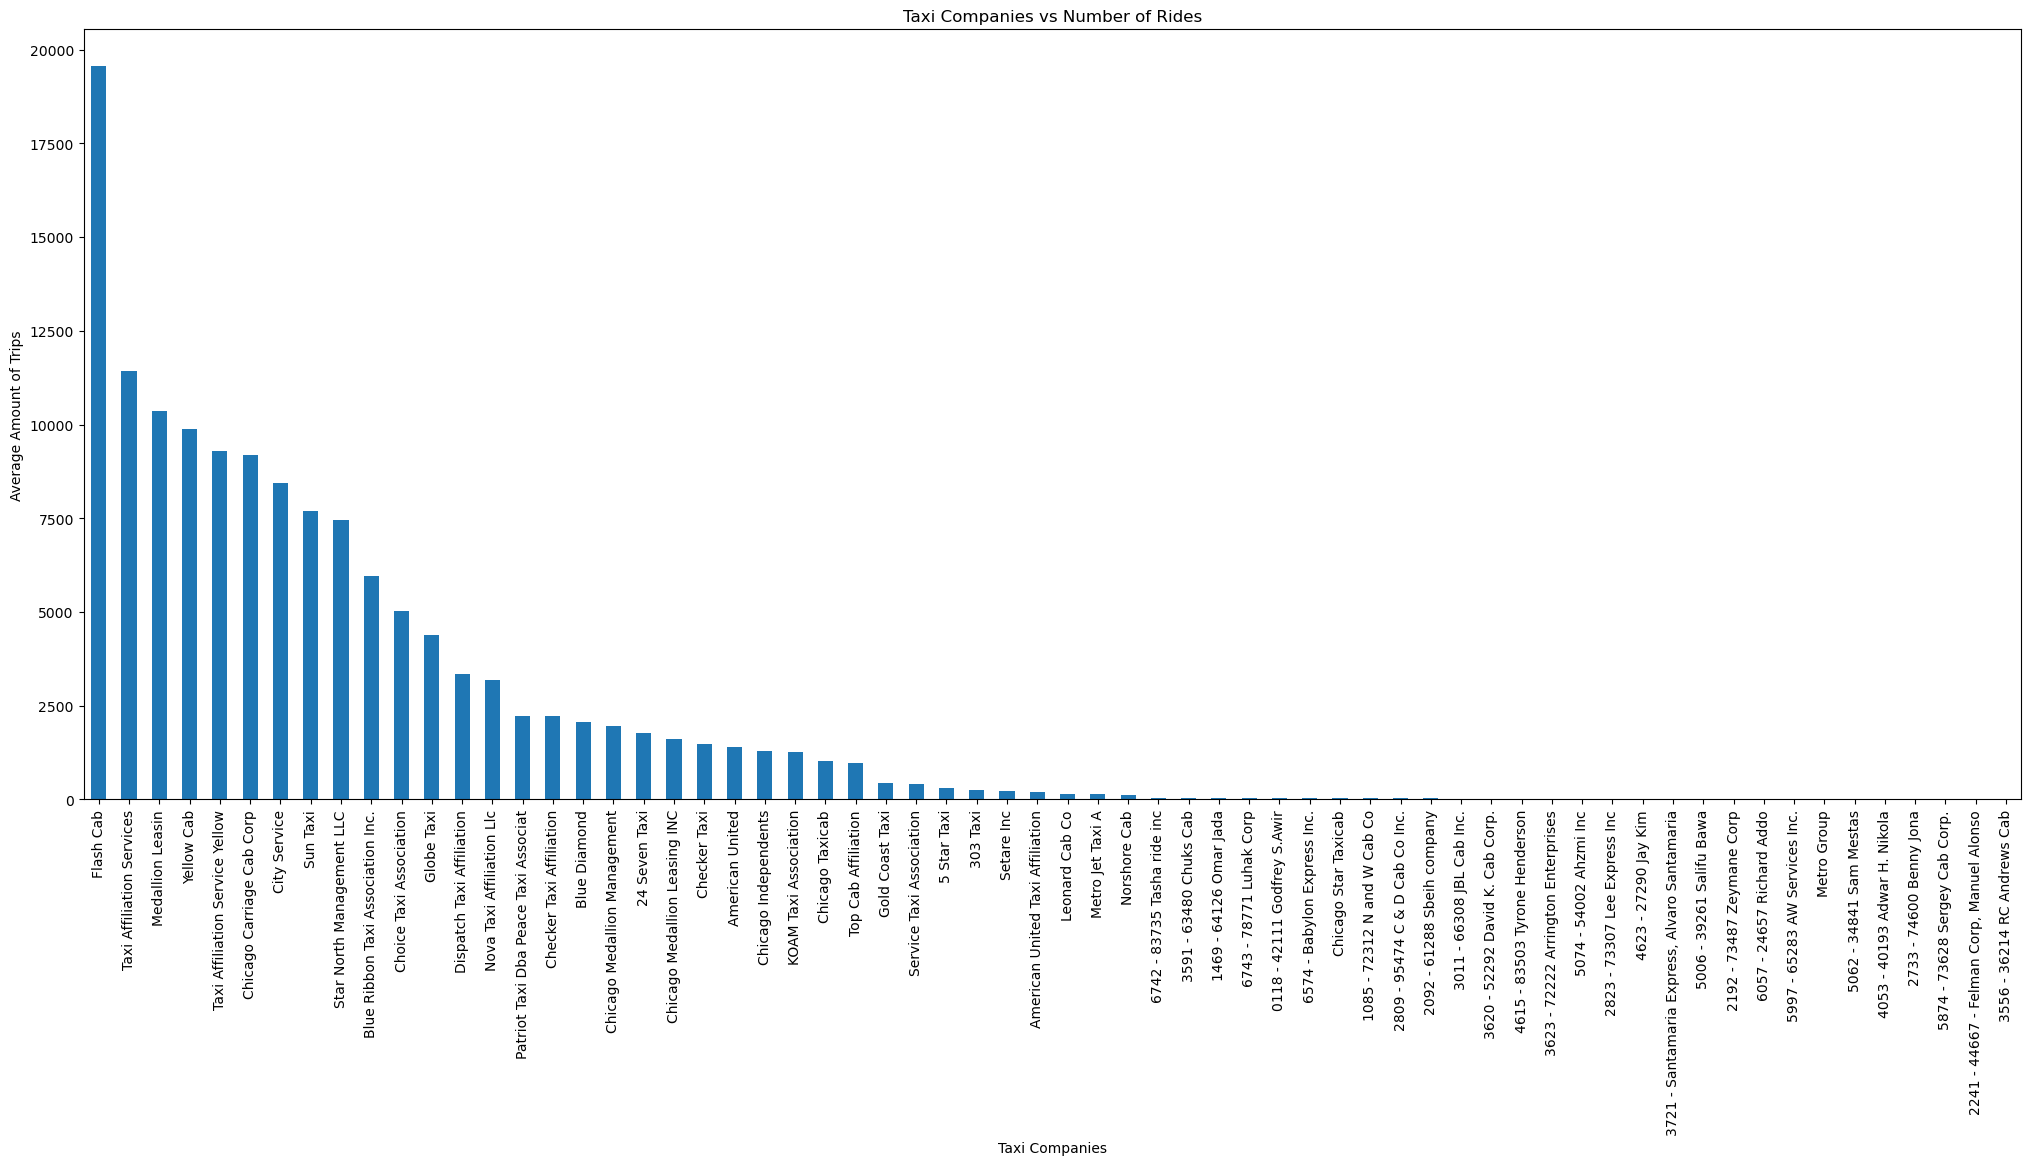

In [9]:
# Plot bar chart to vizualize distribution of number of rides per taxi company in Chicago
result_01.plot(kind='bar', 
                      x='company_name', 
                      xlabel='Taxi Companies', 
                      ylabel='Average Amount of Trips', 
                      title='Taxi Companies vs Number of Rides',
                      legend=False,
                      figsize=(25, 10))

As depicted in the bar plot above, Flash Cab emerges as the most utilized taxi company in Chicago, significantly surpassing its competitors in terms of trip volume. With almost 20,0000 trips, Flash Cab establishes a commanding presence in the Chicago taxi market, reflecting a strong customer preference for its services within the city. Despite the fierce competition, Flash Cab maintains a substantial lead, suggesting a combination of factors such as service quality, availability, and reputation contributing to its popularity among Chicagoans.

Let's now look at the top 10 neighborhoods in Chicago where people are most frequently dropped off by taxi.

In [10]:
# Find the top 10 drop-off locations in Chicago via taxi
top_10_dropoff_neighborhoods = result_04.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_dropoff_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


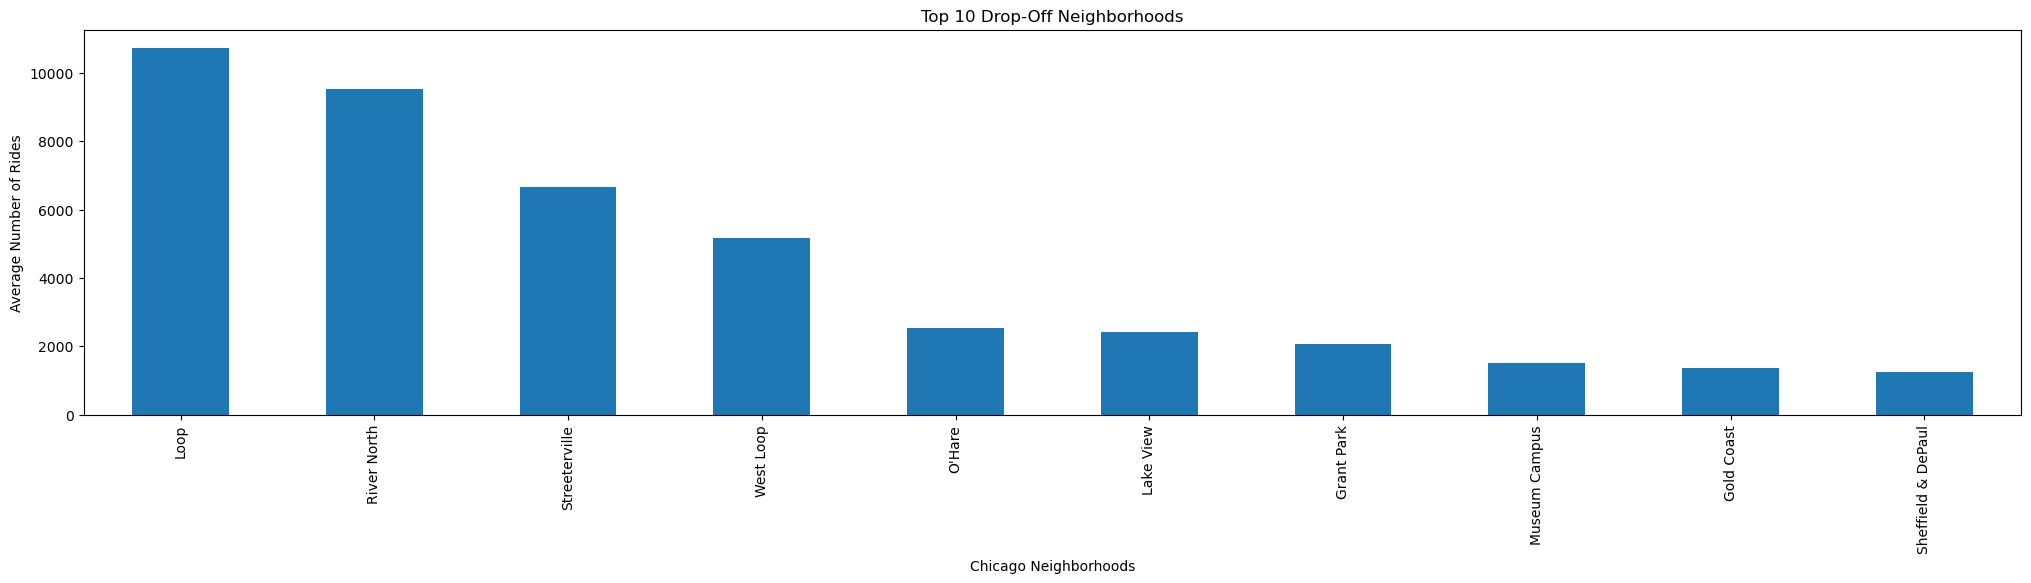

In [11]:
# Plot bar chart for top 10 drop-off locations in Chicago via taxi
top_10_dropoff_neighborhoods.plot(kind='bar', 
                      x='dropoff_location_name', 
                      xlabel='Chicago Neighborhoods', 
                      ylabel='Average Number of Rides', 
                      title='Top 10 Drop-Off Neighborhoods',
                      legend=False,
                      figsize=(25, 5))
plt.show()

Topping the list is the Loop, with an average of approximately 10,727 trips, indicating its central importance as a business, commercial, and cultural hub in Chicago. Following closely is River North, known for its vibrant nightlife, dining scene, and art galleries, with an average of 9,524 trips. Streeterville, characterized by its proximity to Navy Pier and upscale residential areas, ranks third with an average of 6,664 trips. The West Loop, a bustling neighborhood renowned for its culinary scene and tech industry presence, secures the fourth spot with an average of 5,164 trips. Notably, O'Hare Airport emerges as the fifth most common drop-off location, underscoring its significance as a major transportation hub in Chicago. Other notable neighborhoods in the top 10 include Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul, each reflecting diverse aspects of Chicago's urban landscape, including recreational areas, cultural attractions, and residential enclaves. This analysis provides valuable insights into the mobility patterns and destination preferences of taxi passengers in Chicago, shedding light on the city's vibrant neighborhoods and their respective roles within its urban fabric

## Test Hypotheses

We will now investigate whether the average duration of rides from the Loop to O'Hare International Airport varies on rainy Saturdays. To do so, we'll utilize an independent samples t-test.

Before proceeding, it's essential to establish clear null and alternative hypotheses. The null hypothesis (H0) posits that there's no difference in ride duration between good and bad weather conditions, while the alternative hypothesis (H1) suggests otherwise.

Selecting a significance level (alpha) of 0.05 ensures a balanced approach, allowing for the detection of genuine differences while minimizing the risk of Type I errors. This standard threshold conforms to conventional statistical practices, offering a reasonable compromise between sensitivity and error control.

In [12]:
# Test the hypotheses

 #h0 = The average duration of rides from the Loop to O'Hare International Airport does NOT change on rainy Saturdays.
 #h1 = The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

good = result_07[result_07['weather_conditions'] == 'Good']['duration_seconds']
bad = result_07[result_07['weather_conditions'] == 'Bad']['duration_seconds']

# Perform independent samples t-test
results = st.ttest_ind(good, bad)

print('p-value:', results.pvalue)
print()

# Check the p-value against alpha
alpha = 0.05

if results.pvalue < alpha:
    print("We reject the null hypothesis.")

else:
    print("We cannot reject the null hypothesis.")

p-value: 6.517970327099473e-12

We reject the null hypothesis.



With a p-value of 6.52e-12, we reject the null hypothesis, indicating significant evidence to suggest that the average duration of rides from the Loop to O'Hare International Airport differs between good and bad weather conditions on Saturdays. This outcome underscores the influence of weather on travel durations, highlighting the importance of considering weather variables in transportation planning and management.

## Conclusion

In conclusion, our analysis provides a comprehensive overview of Chicago's taxi industry and travel patterns, shedding light on both the preferences of passengers and the dynamics of transportation within the city. Flash Cab emerges as the dominant player in the taxi market, with its significantly higher trip volume signaling strong customer loyalty and satisfaction. Meanwhile, the top 10 drop-off locations reveal the diverse tapestry of Chicago's neighborhoods, with the Loop and River North standing out as bustling commercial and cultural centers. Notably, O'Hare Airport's prominence underscores its vital role as a transportation hub. Moreover, our investigation into the influence of weather on ride durations highlights the practical implications of weather conditions on travel behavior. The rejection of the null hypothesis underscores the need for weather considerations in transportation planning and management. Collectively, these findings offer valuable insights for stakeholders in the transportation sector, informing strategic decision-making and enhancing the overall efficiency of Chicago's transportation network.